![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 3. Modelamiento

Una vez preparados los datos, se procederá con el modelamiento. Recuerden que el objetivo es clasificar a un paciente como hospitalizado o no hospitalizado, teniendo en cuenta un data set que contiene información referente a antecedentes del paciente, morbilidad asociada al paciente y antecedentes relacionados con la toma de la biopsia y complicaciones infecciosas.




Carguen la base de datos preparada desde la fase 2.

In [65]:
import pandas as pd
import seaborn as sns
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score,f1_score,recall_score
from sklearn.metrics import  classification_report
import numpy as np

In [3]:

dfhosp=pd.read_csv('Hospitalización.csv')
dfhosp.head()


,Edad,Diabetes,Hospitalización ultimo mes,PSA,Biopsias previas,Volumen prostático,Biopsia,Número de dias post biopsia en que se presenta la complicación infecciosa,Fiebre,Infección de Tracto Urinario,Agente aislado,Patrón de resistencia,Hospitalización
0,53,0,0,4.0,0,1,9,1,1,0,1,2,1
1,56,0,0,7.7,0,1,9,1,1,0,1,2,1
2,57,0,0,29.0,1,1,9,1,1,0,0,0,1
3,56,0,0,7.0,0,1,9,1,1,0,1,2,1
4,55,0,0,29.0,1,1,9,1,1,0,0,2,1


Separen el dataset en X, y (variable objetivo)

Text(0.5, 1.0, 'Cantidad de Hospitalización antes de balanceo')

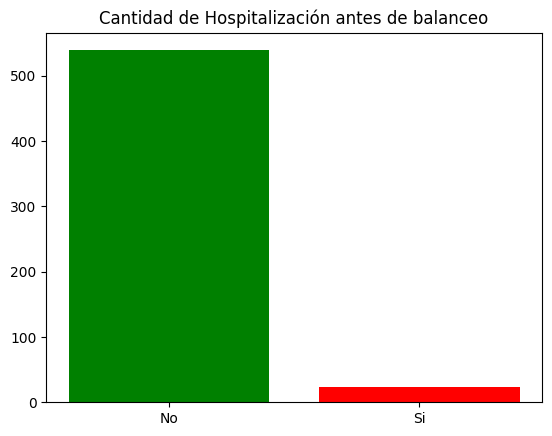

In [76]:
#se hace balanceo de datos, ya que las prediciones están desbalanceadas
plt.bar(x=dfhosp.Hospitalización.value_counts().index,height=dfhosp.Hospitalización.value_counts(),color=['green','red'])
plt.xticks([0,1],['No','Si'])
plt.title('Cantidad de Hospitalización antes de balanceo')

Separen el dataset en X_train, X_test, y_train y y_test

In [127]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.50)

In [128]:
smt=SMOTEENN()
x_train_res, y_train_res = smt.fit_resample(x_train, y_train)

Instancien, entrenen y predigan sobre un árbol de decisión asignando una profundidad máxima arbitraria

In [125]:
dt=DecisionTreeClassifier(max_depth=6)
dt.fit(x_train_res,y_train_res)
y_train_pred=dt.predict(x_train_res)
y_test_pred=dt.predict(x_test)

Realicen la matriz de confusión para este modelo. Se recomienda utilizar mapa de calor para la visualización. 

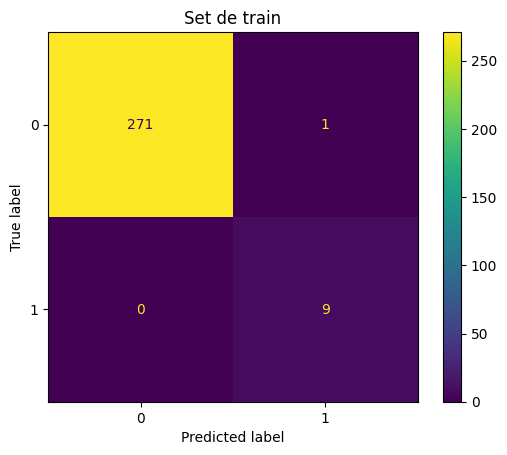

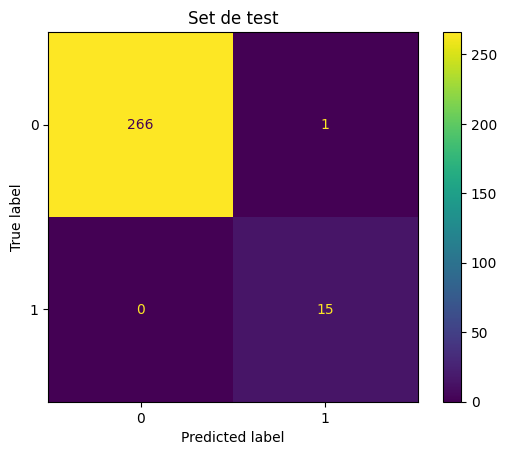

In [126]:
cm_train=confusion_matrix(y_train_res,y_train_pred)
cm_test=confusion_matrix(y_test,y_test_pred)
cm_displaytrain=ConfusionMatrixDisplay(cm_train)
cm_displaytest=ConfusionMatrixDisplay(cm_test)
cm_displaytrain.plot()
plt.title('Set de train')
plt.show()
cm_displaytest.plot()
plt.title('Set de test')
plt.show()

Seleccione tres métricas de evaluación para este modelo de clasificación y describa el significado de cada una de ellas para el modelo creado.

In [107]:
#accuracy socre indica el ajsute del modelo parapredecir los resultados, y vemos un ajuste casi perfecto con los datos dados, tanto en train como en test
print(f'accuracy score del set de train: {accuracy_score(y_train,y_train_pred)}')
print(f'accuracy score del set de test: {accuracy_score(y_test,y_test_pred)}')
print(f'f1 score del set de train: {f1_score(y_train,y_train_pred)}')
print(f'f1 score del set de test: {f1_score(y_test,y_test_pred)}')
print(f'la exhaustividad del set de train es de: {recall_score(y_train,y_train_pred)}')
print(f'la exhaustividad del set de test es de: {recall_score(y_test,y_test_pred)}')

accuracy score del set de train: 0.9976303317535545
accuracy score del set de test: 0.9929078014184397
f1 score del set de train: 0.9714285714285714
f1 score del set de test: 0.9333333333333333
la exhaustividad del set de train es de: 1.0
la exhaustividad del set de test es de: 1.0


Realice un diagrama de la importancia de cada variable respecto a la clasificación de la variable objetivo

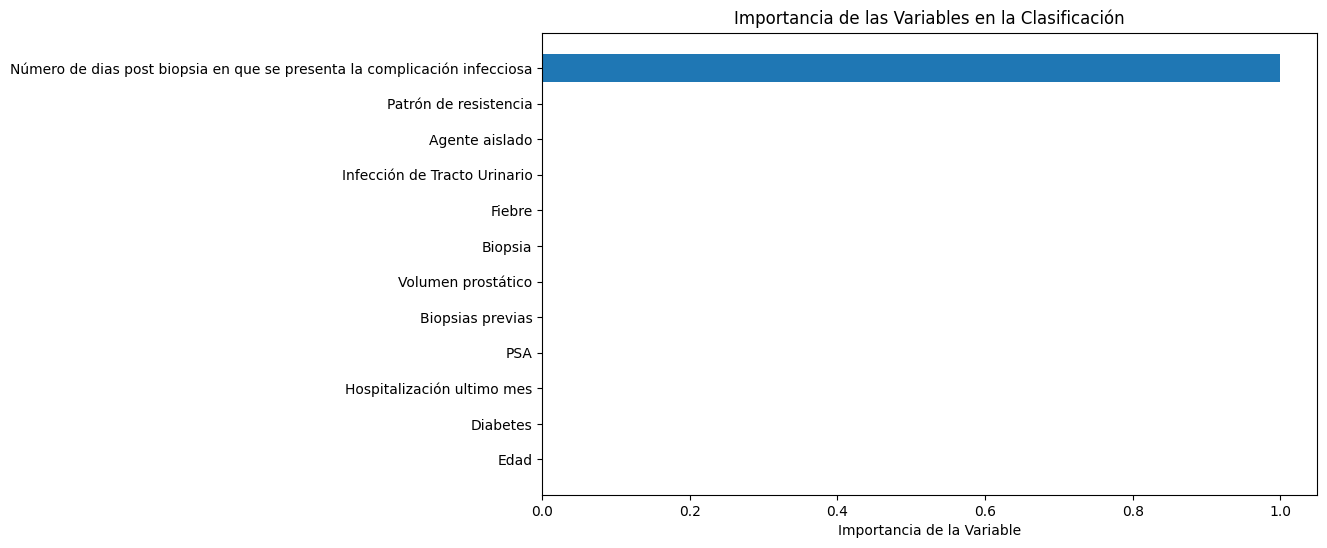

In [108]:
importancias_variables=dt.feature_importances_
variables = len(importancias_variables)
indices_variables = np.argsort(importancias_variables)

plt.figure(figsize=(10, 6))
plt.barh(range(variables), importancias_variables[indices_variables], align="center")
plt.yticks(range(variables), X.columns[indices_variables])
plt.xlabel("Importancia de la Variable")
plt.title("Importancia de las Variables en la Clasificación")
plt.show()

Encuentre cuál sería un valor óptimo para el hiperparámetro **max_depth** para el árbol de decisión. Construya un modelo con este valor y compare las métricas de evaluación respecto al modelo creado con una profundidad arbitraria. 

Instancien, entrenen y predigan sobre un modelo de k-vecinos asignando una cantidad de vecinos k-aribitraria. 

Encuentre el valor óptimo para k

Halle las mismas tres métricas de evaluación para este modelo de clasificación y compare los valores para el performance, respecto al árbol de decisión cuyo hiperparámetro **max_depth** se optimizó. ¿Qué puede concluir? 

De acuerdo con lo aprendido en el módulo, ¿Cómo cree que se puede mejorar el performance de este modelo? 

R/